# Exoplanet Candidate Light Curve Detection
I will be building a system that will help Astrophysicist if the planet is an exoplanet or just a noise which will eventually help them and save their time on investigating non exoplanet.
In this whole project from start to end we will build an end to end ml pipeline include from cleaning, EDA , tuning , encoding , baseline models and also some deep learning task to enhance it and apply the knowledge of it for learning purpose too and give a meaningful project without overdoing things irrationally.
we will be using labelled dataset of keepler time series data (exoTrain.csv.zip,exoTest.csv.zip)

# Data Info

In [1]:
import pandas as pd 

In [2]:
exo_train = pd.read_csv("../Raw data/exoTrain.csv.zip")
exo_test = pd.read_csv("../Raw data/exoTest.csv.zip")
print(exo_train, exo_test)

      LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0

In [3]:
exo_train.head(5), exo_train.tail(5)

(   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
 0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
 1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
 2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
 3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
 4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
 
     FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
 0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
 1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
 2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
 3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
 4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   
 
    FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
 0      48.57      92.54      39.32      61

- Each FLUX column = brightness at a specific time step
- Each row = A time series signal

In [4]:
exo_test.head(5), exo_test.tail(5)

(   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
 0      2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
 1      2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
 2      2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
 3      2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
 4      2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
 
     FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
 0     6.98     6.63  ...      14.52      19.29      14.44      -1.62   
 1  5569.47  5550.44  ...    -581.91    -984.09   -1230.89   -1600.45   
 2   362.95   207.27  ...      17.82     -51.66     -48.29     -59.99   
 3  -746.50  -709.53  ...     122.34      93.03      93.03      68.81   
 4   -45.20    -5.04  ...     -37.87     -61.85     -27.15     -21.18   
 
    FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
 0      13.33      45.50      3

In [5]:
print(f"Test set shape: {exo_test.shape[0]} rows * {exo_test.shape[1]} columns")

Test set shape: 570 rows * 3198 columns


In [6]:
print("\n Columns")
print(exo_test.columns.to_list())


 Columns
['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7', 'FLUX.8', 'FLUX.9', 'FLUX.10', 'FLUX.11', 'FLUX.12', 'FLUX.13', 'FLUX.14', 'FLUX.15', 'FLUX.16', 'FLUX.17', 'FLUX.18', 'FLUX.19', 'FLUX.20', 'FLUX.21', 'FLUX.22', 'FLUX.23', 'FLUX.24', 'FLUX.25', 'FLUX.26', 'FLUX.27', 'FLUX.28', 'FLUX.29', 'FLUX.30', 'FLUX.31', 'FLUX.32', 'FLUX.33', 'FLUX.34', 'FLUX.35', 'FLUX.36', 'FLUX.37', 'FLUX.38', 'FLUX.39', 'FLUX.40', 'FLUX.41', 'FLUX.42', 'FLUX.43', 'FLUX.44', 'FLUX.45', 'FLUX.46', 'FLUX.47', 'FLUX.48', 'FLUX.49', 'FLUX.50', 'FLUX.51', 'FLUX.52', 'FLUX.53', 'FLUX.54', 'FLUX.55', 'FLUX.56', 'FLUX.57', 'FLUX.58', 'FLUX.59', 'FLUX.60', 'FLUX.61', 'FLUX.62', 'FLUX.63', 'FLUX.64', 'FLUX.65', 'FLUX.66', 'FLUX.67', 'FLUX.68', 'FLUX.69', 'FLUX.70', 'FLUX.71', 'FLUX.72', 'FLUX.73', 'FLUX.74', 'FLUX.75', 'FLUX.76', 'FLUX.77', 'FLUX.78', 'FLUX.79', 'FLUX.80', 'FLUX.81', 'FLUX.82', 'FLUX.83', 'FLUX.84', 'FLUX.85', 'FLUX.86', 'FLUX.87', 'FLUX.88', 'FLUX.89', 'FLUX.90',

- We will not touch our test set now to not mess in our pipeline and directly evaluate at the end to check our final real world performance.

In [7]:
# Train set shape
print(f"Train set shape: {exo_train.shape[0]} rows * {exo_train.shape[1]} columns")
# List of all columns
print("\n Columns")
print(exo_train.columns.to_list())

Train set shape: 5087 rows * 3198 columns

 Columns
['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7', 'FLUX.8', 'FLUX.9', 'FLUX.10', 'FLUX.11', 'FLUX.12', 'FLUX.13', 'FLUX.14', 'FLUX.15', 'FLUX.16', 'FLUX.17', 'FLUX.18', 'FLUX.19', 'FLUX.20', 'FLUX.21', 'FLUX.22', 'FLUX.23', 'FLUX.24', 'FLUX.25', 'FLUX.26', 'FLUX.27', 'FLUX.28', 'FLUX.29', 'FLUX.30', 'FLUX.31', 'FLUX.32', 'FLUX.33', 'FLUX.34', 'FLUX.35', 'FLUX.36', 'FLUX.37', 'FLUX.38', 'FLUX.39', 'FLUX.40', 'FLUX.41', 'FLUX.42', 'FLUX.43', 'FLUX.44', 'FLUX.45', 'FLUX.46', 'FLUX.47', 'FLUX.48', 'FLUX.49', 'FLUX.50', 'FLUX.51', 'FLUX.52', 'FLUX.53', 'FLUX.54', 'FLUX.55', 'FLUX.56', 'FLUX.57', 'FLUX.58', 'FLUX.59', 'FLUX.60', 'FLUX.61', 'FLUX.62', 'FLUX.63', 'FLUX.64', 'FLUX.65', 'FLUX.66', 'FLUX.67', 'FLUX.68', 'FLUX.69', 'FLUX.70', 'FLUX.71', 'FLUX.72', 'FLUX.73', 'FLUX.74', 'FLUX.75', 'FLUX.76', 'FLUX.77', 'FLUX.78', 'FLUX.79', 'FLUX.80', 'FLUX.81', 'FLUX.82', 'FLUX.83', 'FLUX.84', 'FLUX.85', 'FLUX.86', '

- Each row represents one star

In [8]:
# Data type and null value-counts
print("\n Data info")
exo_train.isnull().value_counts()


 Data info


LABEL  FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  FLUX.40  FLUX.41  FLUX.42  FLUX.43  FLUX.44  FLUX.45  FLUX.46  FLUX.47  FLUX.48  FLUX.49  FLUX.50  FLUX.51  FLUX.52  FLUX.53  FLUX.54  FLUX.55  FLUX.56  FLUX.57  FLUX.58  FLUX.59  FLUX.60  FLUX.61  FLUX.62  FLUX.63  FLUX.64  FLUX.65  FLUX.66  FLUX.67  FLUX.68  FLUX.69  FLUX.70  FLUX.71  FLUX.72  FLUX.73  FLUX.74  FLUX.75  FLUX.76  FLUX.77  FLUX.78  FLUX.79  FLUX.80  FLUX.81  FLUX.82  FLUX.83  FLUX.84  FLUX.85  FLUX.86  FLUX.87  FLUX.88  FLUX.89  FLUX.90  FLUX.91  FLUX.92  FLUX.93  FLUX.94  FLUX.95  FLUX.96  FLUX.97  FLUX.98  FLUX.99  FLUX.100  FLUX.101  FLUX.102  FLUX.103  FLUX.104  FLUX.105  FLUX.106  FLUX.107  FLUX.108  FLUX.109  FLUX.110  F

- Here no null value will exist because as its an exoplanet dataset so its mandatory that planet will exist or not.if it doesnt present no other info would be present and on contrast if it exist it will have any kind od info. 

In [9]:
exo_train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


- 75% or more data is at '1' means its an highly imbalance dataset.which will be dealt in the further steps.   

In [10]:
label_map = {1: "Non-Exoplanet",2: "Exoplanet"}
print(exo_train['LABEL'].map(label_map).value_counts())

LABEL
Non-Exoplanet    5050
Exoplanet          37
Name: count, dtype: int64


In [11]:
exo_train["LABEL"].value_counts(normalize=True)

LABEL
1    0.992727
2    0.007273
Name: proportion, dtype: float64

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Do Exoplanet Stars behave differently then Non-Exoplanet stars?
Exo_planet = exo_train[exo_train['LABEL'] == 2]
NonExo_planet = exo_train[exo_train['LABEL'] == 1]
# Randomly pick the sample as taking first rows or last rows will create (bias)
planet_sample = Exo_planet.sample(5, random_state= 42)
non_planet_sample = NonExo_planet.sample(5, random_state=42)

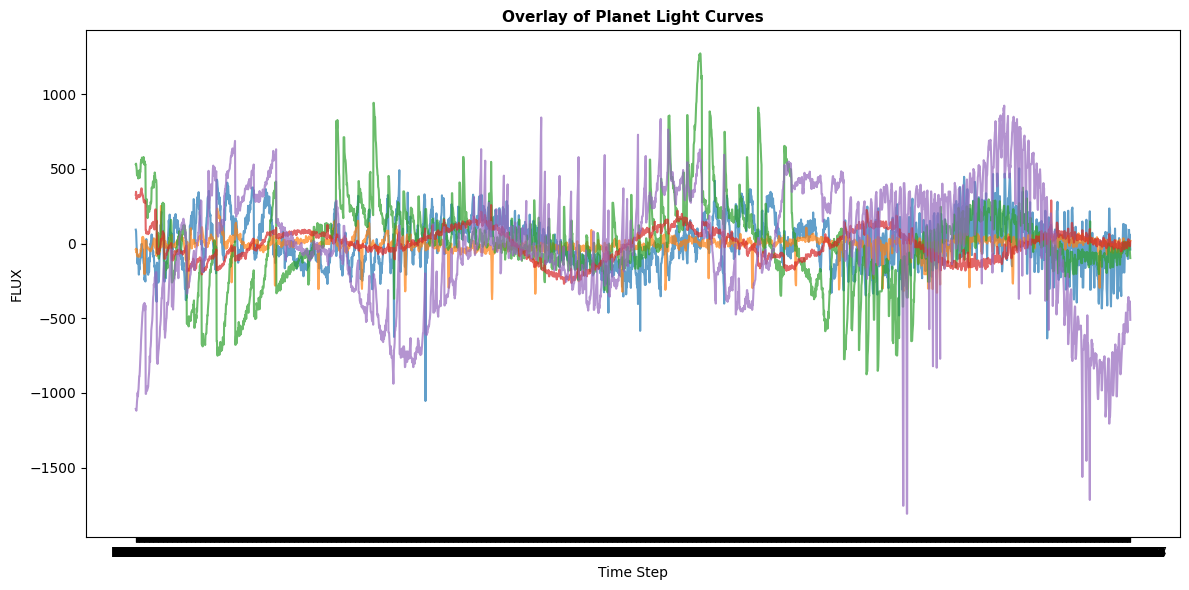

In [13]:
plt.figure(figsize=(12, 6))

for i in range (5):
    plt.plot(Exo_planet.iloc[i, 1:], alpha = 0.7)

plt.title("Overlay of Planet Light Curves",fontsize=11, fontweight='bold')
plt.xlabel("Time Step")
plt.ylabel("FLUX")
plt.tight_layout()
plt.show()

- Each coloured line represents a different star that has a confirmed Exoplanet. They are all planets,just different stars our curve looks messy because every star has its own properties like brightness, noise, orbit timing because its noise we cant say clearly where it takes a dip.

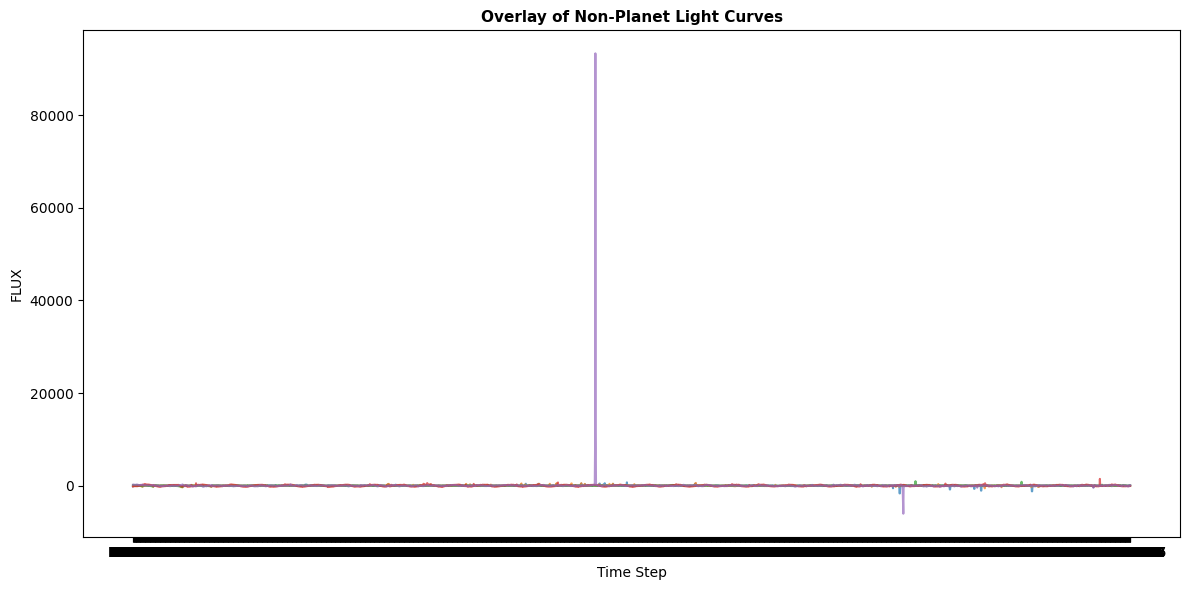

In [14]:
plt.figure(figsize=(12, 6))

for i in range (5):
    plt.plot(NonExo_planet.iloc[i, 1:], alpha = 0.7)

plt.title("Overlay of Non-Planet Light Curves",fontsize=11, fontweight='bold')
plt.xlabel("Time Step")
plt.ylabel("FLUX")
plt.tight_layout()
plt.show()

- Here its clearly seen that a outlier has result in great spike which means instrument noise or an unsual signal and visual distortion. This should be handle before modelling so we will normalization to shrink our value to 0 to 1or -1 to 1.

In [15]:
# Saving our exact same indices that is been used to plot above graphs for furthur comparison after normalization 
sample_indices = Exo_planet.sample(5, random_state= 42).index


# Normalization
- Some stars are bright and some are dim model will learn brightness not planet dips. we will use z-score normalization technique so that every star lives on the same scale  

In [16]:
import numpy as np
# To split the LABEL and FLUX to not change LABEL
x = exo_train.iloc[:, 1:].values #FLUX
y = exo_train.iloc[:, 0].values #LABEl

std = x.std(axis=1, keepdims= True)
std[std == 0] = 1 # we handle it and make it 1 because some stars might have flat signals

# we applied Row-wise Z-score normalisation 
X_norm = (x-x.mean(axis=1, keepdims= True)) / std
print(np.mean(X_norm[0]))
print(np.std(X_norm[0]))


1.8224743300696972e-16
1.0000000000000002


- Our normalzation is been done properly our values are centered around 0 for each star which would be helpful for the model and plotting both 

In [17]:
print(np.isnan(X_norm).sum()) # To check number of NAN values 
print(np.isinf(X_norm).sum()) # To check if their exist infinity

0
0


In [18]:
# We have to take exact same samples that we used before normalization plotting
X_norm_df  = pd.DataFrame(X_norm)
X_norm_df['LABEL'] = exo_train['LABEL'].values
Exo_planet_norm = X_norm_df[X_norm_df['LABEL'] == 2]
planet_sample_norm = Exo_planet_norm.loc[sample_indices]

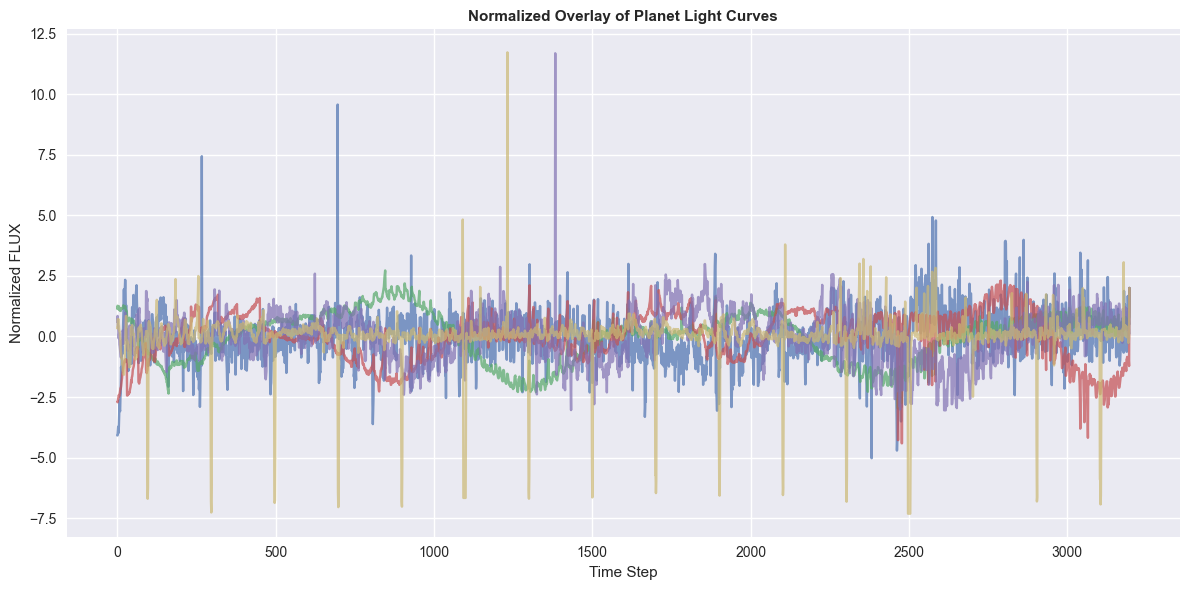

In [19]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

for i in range(len(planet_sample_norm)):
    plt.plot(planet_sample_norm.iloc[i, 1:].values, alpha = 0.7)

plt.title("Normalized Overlay of Planet Light Curves",fontsize=11, fontweight='bold')
plt.xlabel("Time Step")
plt.ylabel("Normalized FLUX")
plt.tight_layout()
plt.show()



In [20]:
nonexo_indices = NonExo_planet.sample(5, random_state= 42).index
NonExo_planet_norm = X_norm_df[X_norm_df['LABEL'] == 1]
Nonplanet_sample_norm = NonExo_planet_norm.loc[nonexo_indices]

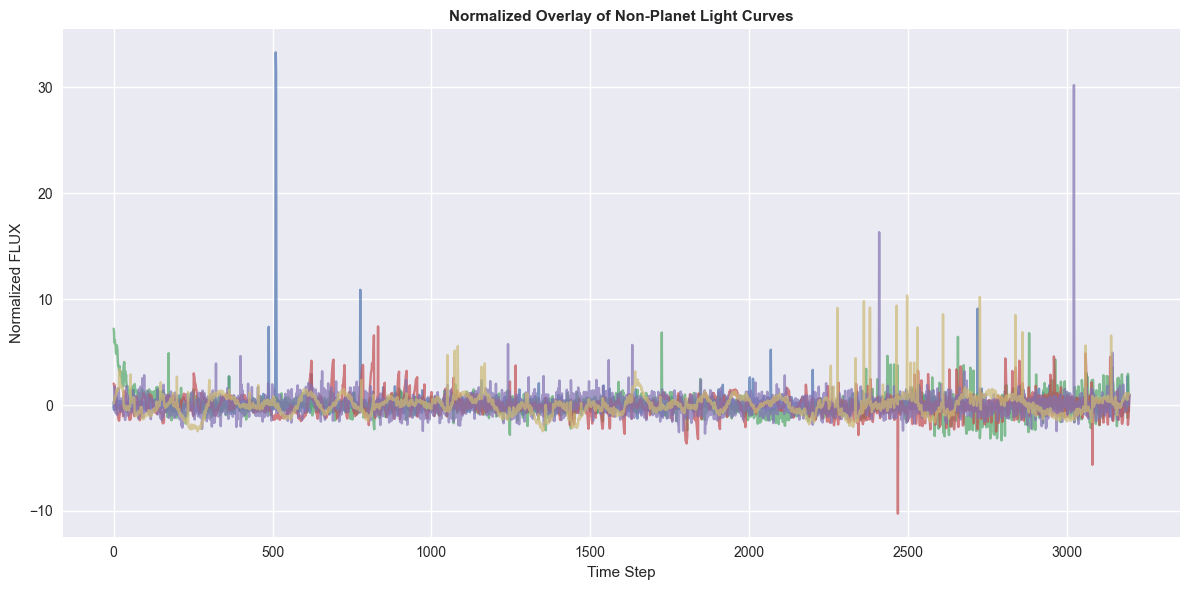

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

for i in range(len(Nonplanet_sample_norm)):
    plt.plot(Nonplanet_sample_norm.iloc[i, 1:].values, alpha = 0.7)

plt.title("Normalized Overlay of Non-Planet Light Curves",fontsize=11, fontweight='bold')
plt.xlabel("Time Step")
plt.ylabel("Normalized FLUX")
plt.tight_layout()
plt.show()


In [24]:
print(X_norm_df.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
          3188,    3189,    3190,    3191,    3192,    3193,    3194,    3195,
          3196, 'LABEL'],
      dtype='object', length=3198)


# Average Light curve per class

In [ ]:
avg_planet = X_norm_df[X_norm_df['LABEL']]